# *Import Libraries*

In [1]:
!pip install statsmodels

You should consider upgrading via the 'C:\Users\Hewlett Packard\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats

%matplotlib inline

# *About Dataset*

Data ini, diproses dari file *nyc-rolling-sales.csv*.

Dataset ini merupakan data catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti kota New York selama periode 12 bulan.

Dataset ini berisi lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi pada bidang yang lebih rumit :

* **BOROUGH** : Kode digit untuk borough tempat properti berada: secara berurutan Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5);
* **BLOCK; LOT** : Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL;
* **BUILDING CLASS AT PRESENT** and **BUILDING CLASS AT TIME OF SALE** : Jenis bangunan di berbagai titik waktu.

# *Reading Dataset*

In [3]:
# Deteksi format non standard missing values
missing_values = ['NA', 'na', 'n/a', '--', '?']

# Read Dataset 
df = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# *Preprocessing*

In [4]:
# Mengetahui dimensi dari dataset
baris, kolom = df.shape
print("Dimensi Data")
print("Jumlah baris :", baris)
print("Jumlah kolom :", kolom)

Dimensi Data
Jumlah baris : 84548
Jumlah kolom : 22


In [5]:
# Mengetahui kolom yang terdapat pada data
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [6]:
# Mengetahui adanya null values dan tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Mengetahui semua nilai unik dari setiap kolom untuk melihat adanya anomali *(unstandard missing value)*

In [7]:
for col in df.columns :
    print("UNIQUE VALUES FOR", col)
    print("="*20)
    print(df[col].unique())
    print("="*70)

UNIQUE VALUES FOR Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTO

**Analisis**

Pada beberapa kolom masih terdapat unstandard missing values yang tidak berhasil diidentifikasi oleh Pandas sebagai missing values. Berikut ini adalah rangkumannya:

1. Kolom "Unnamed: 0" sebagai iterator dan tidak diperlukan untuk analisis berikutnya, sehingga akan didrop
2. Kolom 'TAX CLASS AT PRESENT' mengandung nilai (' ') yang diidentifikasi sebagai missing values
3. Kolom 'EASE-MENT' tidak mengandung informasi dan hanya memuat satu nilai (' ') yang diidentifikasi sebagai missing values, sehingga untuk selanjutnya akan dibuang
4. Kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' mengandung nilai (' ') yang diidentifikasi sebagai missing values.
5. Kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' mengandung nilai (0) yang diidentifikasi sebagai missing values
6. Kolom 'SALE PRICE' mengandung nilai (' - ') yang diidentifikasi sebagai missing values, selanjutnya nilai ini akan diganti dengan 0 dan dianggap tidak ada transaksi

# *Data Cleaning*

### Membaca ulang *dataset* dengan menambahkan *unstandard missing values*

In [8]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)

In [9]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df['YEAR BUILT'] = df['YEAR BUILT'].replace({0:np.nan})
df['ZIP CODE'] = df['ZIP CODE'].replace({0:np.nan})
df['TOTAL UNITS'] = df['TOTAL UNITS'].replace({0:np.nan})

### Mengecek ulang adanya missing values *(unstandard missing value)*

In [10]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

**Analisis** 

Dapat dilihat bahwa setelah dimasukkan simbol-simbol baru yang menandakan *unstandard missing values*, terdapat beberapa *missing values*

### Menghapus kolom-kolom yang tidak diperlukan

1. Kolom **Unnamed: 0** sebagai iterator
2. kolom **EASE-MENT** tidak mengandung nilai yang dibutuhkan untuk analisis berikutnya
3. Kolom **ADDRESS** dan **APARTEMENT NUMBER** adalah kolom yang tidak diperlukan untuk analisis berikutnya

In [11]:
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df.drop(unnecessary_columns, inplace = True, axis = 1)

In [12]:
# Show dataframe after remove unnecessary columns
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


### Mengatasi *missing values*

In [13]:
# Mengecek jumlah missing values pada setiap kolom
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [14]:
# Mengganti nilai missing values pada setiap kolom kategorik dengan nilai modusnya
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns :
    df[cat_col].fillna(df[cat_col].mode()[0], inplace = True)


### Mengganti nilai *missing values* untuk kolom numerik (kecuali SALE PRICE) dengan nilai median

Nilai median digunakan untuk mengganti nilai missing values dari setiap kolom (kecuali SALE PRICE) karena cenderung tidak terpengaruh dengan adanya data pencilan

In [15]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns :
    df[float_col].fillna(df[float_col].median(), inplace = True)

### Menghapus sisa kolom yang masih memuat *missing values*

Kolom SALE PRICE dan TOTAL UNIT yang memiliki nilai **nan** tidak bisa diartikan.

In [16]:
df.dropna(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ZIP CODE                        52363 non-null  float64
 8   RESIDENTIAL UNITS               52363 non-null  int64  
 9   COMMERCIAL UNITS                52363 non-null  int64  
 10  TOTAL UNITS                     52363 non-null  float64
 11  LAND SQUARE FEET                52363 non-null  float64
 12  GROSS SQUARE FEET               

### Mengecek dan menghapus baris duplikat

In [18]:
# Check for all duplicates row
df[df.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [19]:
# Print sum for all duplicates
rows_duplicated = df.duplicated()
rows_duplicated.sum()

367

In [20]:
# Drop duplicate row
df.drop_duplicates(subset = df.columns, keep = 'first', inplace = True)

# Show records after remove duplicates row
df.shape

(51996, 18)

**ANALISIS**

Ada sejumlah **367** data duplikat, data duplikat ini akan dihapus

### Mengubah tipe data setiap kolom sesuai dengan tipe data yang seharusnya

* Kolom Kategorikal (String) : ('BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT')
* Kolom Float (bilangan rasional) : ('SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET')
* Kolom Integer (bilangan bulat) : (BLOCK, LOT)

In [23]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
                        'TAX CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 
                        'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# Mengubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns :
    df[col] = df[col].astype('str')

# Mengubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns :
    df[col] = df[col].astype('float64')

# Mengubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns :
    df[col] = df[col].astype('int64')

In [22]:
# Mengecek tipe data semua kolom setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

### Mengganti nilai pada kolom 'BOROUGH' dengan nilai yang seharusnya dan menjadi tipe *string*

In [25]:
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}, inplace = True)

### Modifikasi kolom 'SALE DATE'


Ubah kolom 'SALE DATE' menjadi tipe datetime serta tambahkan kolom year, month, date, lalu hapus kolom 'SALE DATE'

In [26]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE DATE dt'] = df['SALE DATE'].dt.day
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df.drop('SALE DATE', inplace = True, axis = 1)

# Rename kolom SALE DATE dt menjadi SALE DATE
df.rename(columns = {'SALE DATE dt':'SALE DATE'}, inplace = True)

### Memperbarui dataframe dari *0 - len(df)*

Index dataframe perlu direindex ulang karena berantakan setelah dilakukukan preprocessing

In [27]:
df.index = range(0, len(df))

In [28]:
df.shape

(51996, 21)

### *Remove outliers*

Apabila data berada kurang dari (Q1 - IQR x 1,5) atau lebih dari (Q3 + IQR x 1,5) maka data itu disebut sebagai data pencilan

In [29]:
# Hitung kuartile 3 setiap atribut pada data
Q3 = df.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df[ 
    ~ ((df < (Q1 - steps* IQR)) | (df > (Q3 + steps * IQR))). 
    any(axis = 1)
]

# Melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df = df_filtered

C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_15140\508885918.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_15140\508885918.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_15140\508885918.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~ ((df < (Q1 - steps* IQR)) | (df > (Q3 + steps * IQR))).


# *Showing DataFrame after Preprocessing*

In [30]:
# Menampilkan 5 data teratas
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,10009.0,1,0,...,2325.0,1680.0,1920.0,2,R4,800000.0,2016,September,7,Wednesday


In [31]:
# Menampilkan 5 data terbawah
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
31768,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309.0,2,0,...,4350.0,2840.0,1996.0,1,B2,625000.0,2016,October,18,Tuesday
31769,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309.0,2,0,...,3325.0,1300.0,1995.0,1,B2,509000.0,2016,October,31,Monday
31770,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309.0,2,0,...,2400.0,2575.0,1998.0,1,B9,450000.0,2016,November,28,Monday
31771,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309.0,2,0,...,2498.0,2377.0,1998.0,1,B9,550000.0,2017,April,21,Friday
31772,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309.0,2,0,...,4000.0,1496.0,1925.0,1,B2,460000.0,2017,July,5,Wednesday


In [35]:
# Menampilkan rangkuman pengecekan missing values
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

# Pengukuran Tendensi Sentral

## Mean

In [33]:
print("Mean SALE PRICE =", df['SALE PRICE'].mean())
print("Median SALE PRICE =", df['SALE PRICE'].median())

Mean SALE PRICE = 573835.3769552765
Median SALE PRICE = 517500.0


Hasil *mean* dan *median* untuk kolom 'SALE PRICE' menunjukkan bahwa distribusi data dari atribut ini belum normal, yang ditandai dengan nilai mean lebih besar dari median. Data cenderung condong ke kanan.

## Median

In [36]:
# GROSS SQUARE FEET
print("Median GROSS SQUARE FEET =", df['GROSS SQUARE FEET'].median())
print("Mean GROSS SQUARE FEET =", df['GROSS SQUARE FEET'].mean())

Median GROSS SQUARE FEET = 1680.0
Mean GROSS SQUARE FEET = 1835.175494917068


In [37]:
# LAND SQUARE FEET
print("Median LAND SQUARE FEET =", df['LAND SQUARE FEET'].median())
print("Mean LAND SQUARE FEET =", df['LAND SQUARE FEET'].mean())

Median LAND SQUARE FEET = 2325.0
Mean LAND SQUARE FEET = 2468.019387530293


## Modus *(Mode)*

In [38]:
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols :
    print("Modus "+col+" =", df[col].mode()[0])

Modus BUILDING CLASS CATEGORY = 01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT = R4
Modus BUILDING CLASS AT TIME OF SALE = R4


# *Measure of Spread*

## Range

Implementasi **Range** digunakan untuk menghitung selisih nilai maksimum dan nilai minimum dari kolom 'GROSS SQUARE FEET' dan 'SALE PRICE'

In [39]:
print('Range GROSS SQUARE FEET =', (df['GROSS SQUARE FEET'].max() - df['GROSS SQUARE FEET'].min()))
print('Range SALE PRICE =', (df['SALE PRICE'].max() - df['SALE PRICE'].min()))

Range GROSS SQUARE FEET = 4050.0
Range SALE PRICE = 2100000.0


## Variance

In [41]:
print('Sampel Variance dari GROSS SQUARE FEET =', df['GROSS SQUARE FEET'].var(ddof = 1))
print('Sampel Variance dari SALE PRICE =', df['SALE PRICE'].var(ddof = 1))

Sampel Variance dari GROSS SQUARE FEET = 399625.49966764264
Sampel Variance dari SALE PRICE = 201068107779.60077


## Standard Deviation

In [42]:
print('Sampel Standard Deviation dari GROSS SQUARE FEET =', df['GROSS SQUARE FEET'].var(ddof = 1) ** 0.5)
print('Sampel Standard Deviation dari SALE PRICE =', df['SALE PRICE'].var(ddof = 1) ** 0.5)

Sampel Standard Deviation dari GROSS SQUARE FEET = 632.1593941939348
Sampel Standard Deviation dari SALE PRICE = 448406.18615224387


# Probability Distribution

## Distribusi Normal

Implementasi Distribusi Normal digunakan untuk melihat distribusi dari atribut 'GROSS SQUARE FEET'

### Melihat distribusi (histogram) dari atribut 'GROSS SQUARE FEET'

Text(0, 0.5, 'Frekuensi')

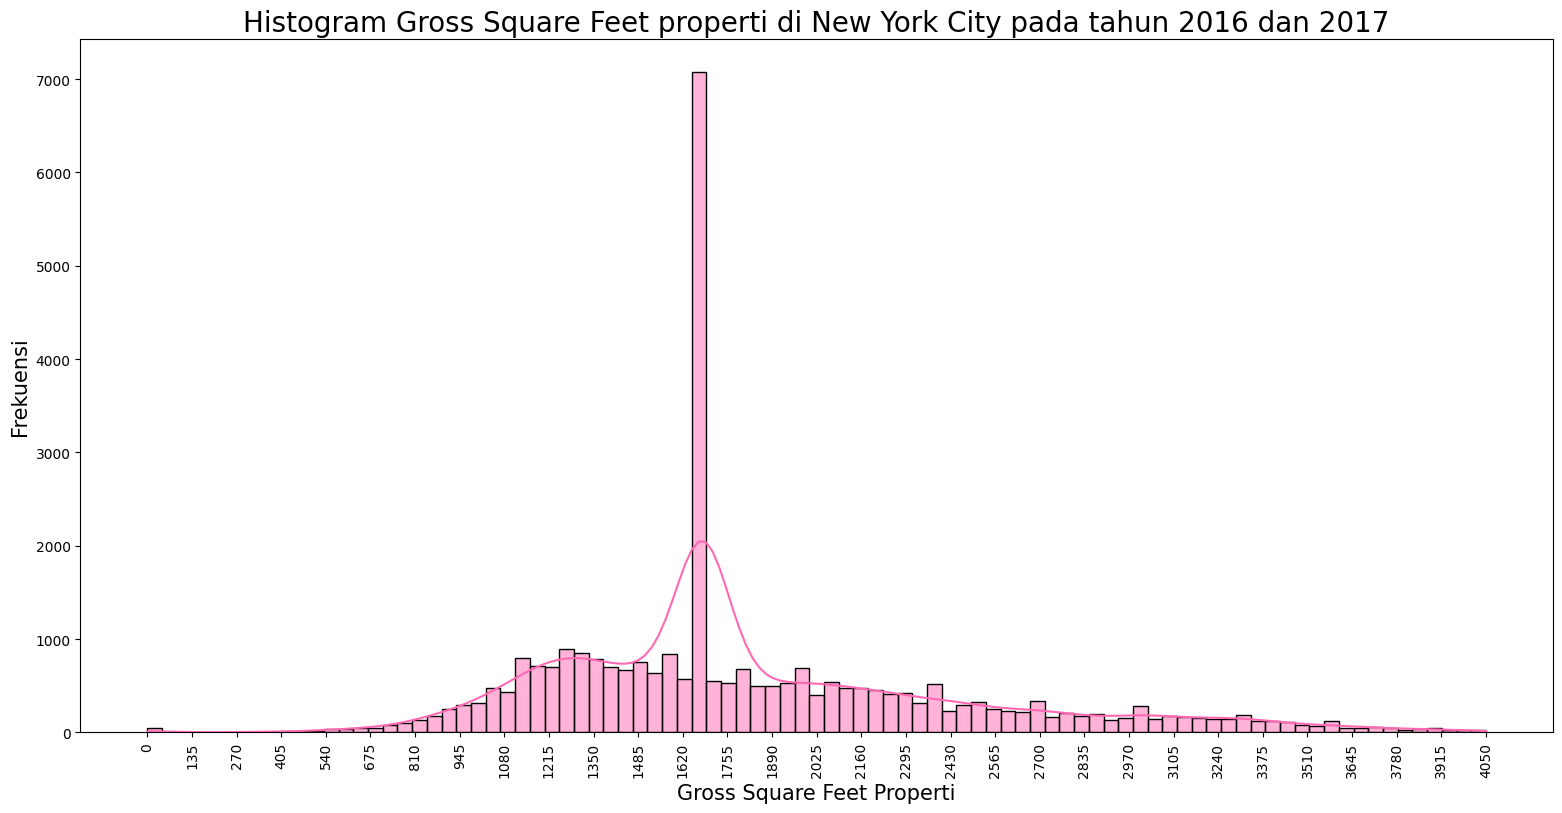

In [84]:
df_gross_square_feet = df['GROSS SQUARE FEET']
fig = plt.figure(figsize = (19, 9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet, bins = 30)
sns.histplot(df_gross_square_feet, kde = True, ax = ax, color = 'hotpink')
ax.set_title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', size = 20)
ax.set_xlabel('Gross Square Feet Properti', size = 15)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 15)

Dari grafik yang ditampilkan dapat dilihat bahwa distribusi data pada atribut 'GROSS SQUARE FEET' belum berdistribusi normal

### Melakukan Central Limit Theorem agar membuat distribusi menjadi normal


Mengambil sejumlah 1000 sample mean dari sejumlah 100 nilai acak.

In [46]:
n = 100
m = 1000
sample_mean_gross_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a = df_gross_square_feet, size = n)
    sample_mean_gross_square_feet.append(np.mean(sample_values))

### Melihat distribusi (histogram) dari sampel mean

Text(0, 0.5, 'Frekuensi')

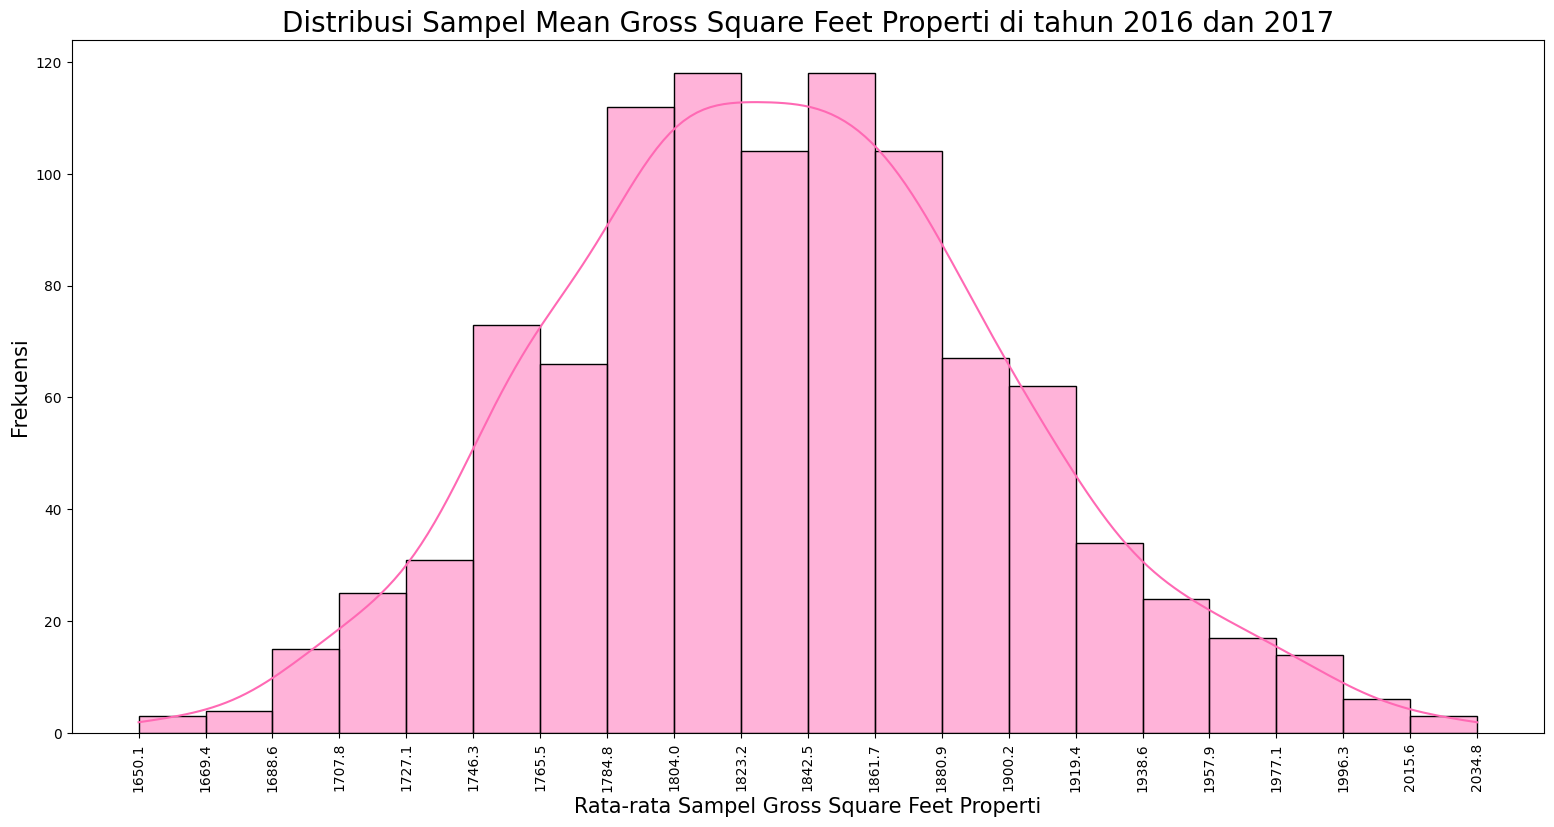

In [83]:
count, bin_edges = np.histogram(sample_mean_gross_square_feet, bins = 20)
fig = plt.figure(figsize = (19, 9))
ax = fig.add_subplot(1, 1, 1)
sns.histplot(sample_mean_gross_square_feet, kde = True, bins = 20, ax = ax, color = 'hotpink')
ax.set_title('Distribusi Sampel Mean Gross Square Feet Properti di tahun 2016 dan 2017', size = 20)
ax.set_xlabel('Rata-rata Sampel Gross Square Feet Properti', size = 15)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 15)

**ANALISIS**

Distribusi dari sampel mean sudah normal

### Mengetahui nilai mean, median, dan standar deviasi dari sampel mean

In [52]:
sample_means_series = pd.Series(sample_mean_gross_square_feet)

# Menghitung nilai rata-rata
print('Rata rata sampel mean GROSS SQUARE FEET =', sample_means_series.mean())

# Menghitung nilai median
print('Median sampel mean GROSS SQUARE FEET =', sample_means_series.median())

# Menghitung standard deviasi 
print('Standar Deviasi sampel mean GROSS SQUARE FEET =', sample_means_series.std())

Rata rata sampel mean GROSS SQUARE FEET = 1834.6108700000002
Median sampel mean GROSS SQUARE FEET = 1832.42
Standar Deviasi sampel mean GROSS SQUARE FEET = 64.98641318646492


### Menghitung standard error dari sampel mean

In [53]:
# Menghitung rata-rata dan standar deviasi populasi
pop_std_gross_square = df_gross_square_feet.std()
pop_mean_gross_square = df_gross_square_feet.mean()

# Menghitung jumlah seluruh populasi
number_of_observation = len(df_gross_square_feet)

# Menghitung standar error
standard_error_of_sampel_mean_gross_feet = pop_std_gross_square / np.sqrt(number_of_observation)

### Hitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi

In [54]:
z_score = 1.96
lower_bound_gross_square = np.mean(sample_mean_gross_square_feet) - z_score * standard_error_of_sampel_mean_gross_feet
upper_bound_gross_square = np.mean(sample_mean_gross_square_feet) + z_score * standard_error_of_sampel_mean_gross_feet
lower_bound_gross_square, upper_bound_gross_square

(1827.659769684394, 1841.5619703156065)

### Histogram akhir

Text(0.5, 0, 'Sampel Mean Gross Square Feet of New York City Properties')

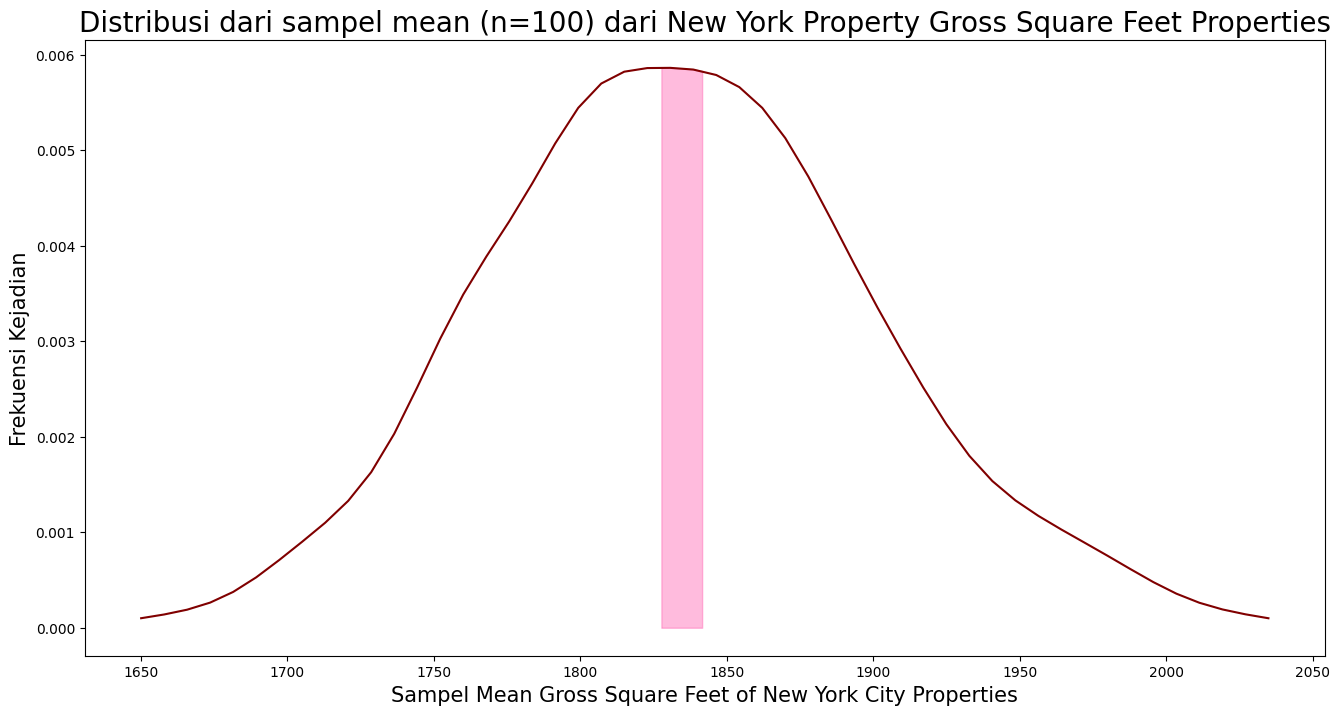

In [82]:
plt.figure(figsize = (16, 8))
kde = scistats.gaussian_kde(sample_mean_gross_square_feet)
pos = np.linspace(np.min(sample_mean_gross_square_feet), np.max(sample_mean_gross_square_feet))
plt.plot(pos, kde(pos), color = 'maroon')
shade = np.linspace(lower_bound_gross_square, upper_bound_gross_square)
plt.fill_between(shade, kde(shade), alpha = 0.45, color = 'hotpink')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Gross Square Feet Properties', size = 20)
plt.ylabel('Frekuensi Kejadian', size = 15)
plt.xlabel('Sampel Mean Gross Square Feet of New York City Properties', size = 15)

**ANALISIS**

Area di bawah kurva yang diarsir menunjukkan 95% data sampel mean GROSS SQUARE FEET berada pada area ini. Atau dengan kata lain berada dalam rentang +- 1.96 z score dari nilai rata-ratanya.

* **Kesimpulan** : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang **1825.9248896843937** sampai **1839.8270903156063** satuan luas

# Confidence Intervals

Confidence Intervals pada kasus ini akan digunakan untuk mengestimasi rata-rata harga jual properti di New York dari tahun 2016 - 2017

### Menghitung rata - rata populasi

In [66]:
pop_mean_sale_price = df['SALE PRICE'].mean()
pop_mean_sale_price

573835.3769552765

### Menghitung standar deviasi dari populasi

In [67]:
pop_std_sale_price = df['SALE PRICE'].std()
pop_std_sale_price

448406.18615224387

### Melihat distribusi (histogram) dari SALE PRICE

Text(0, 0.5, 'Frekuensi')

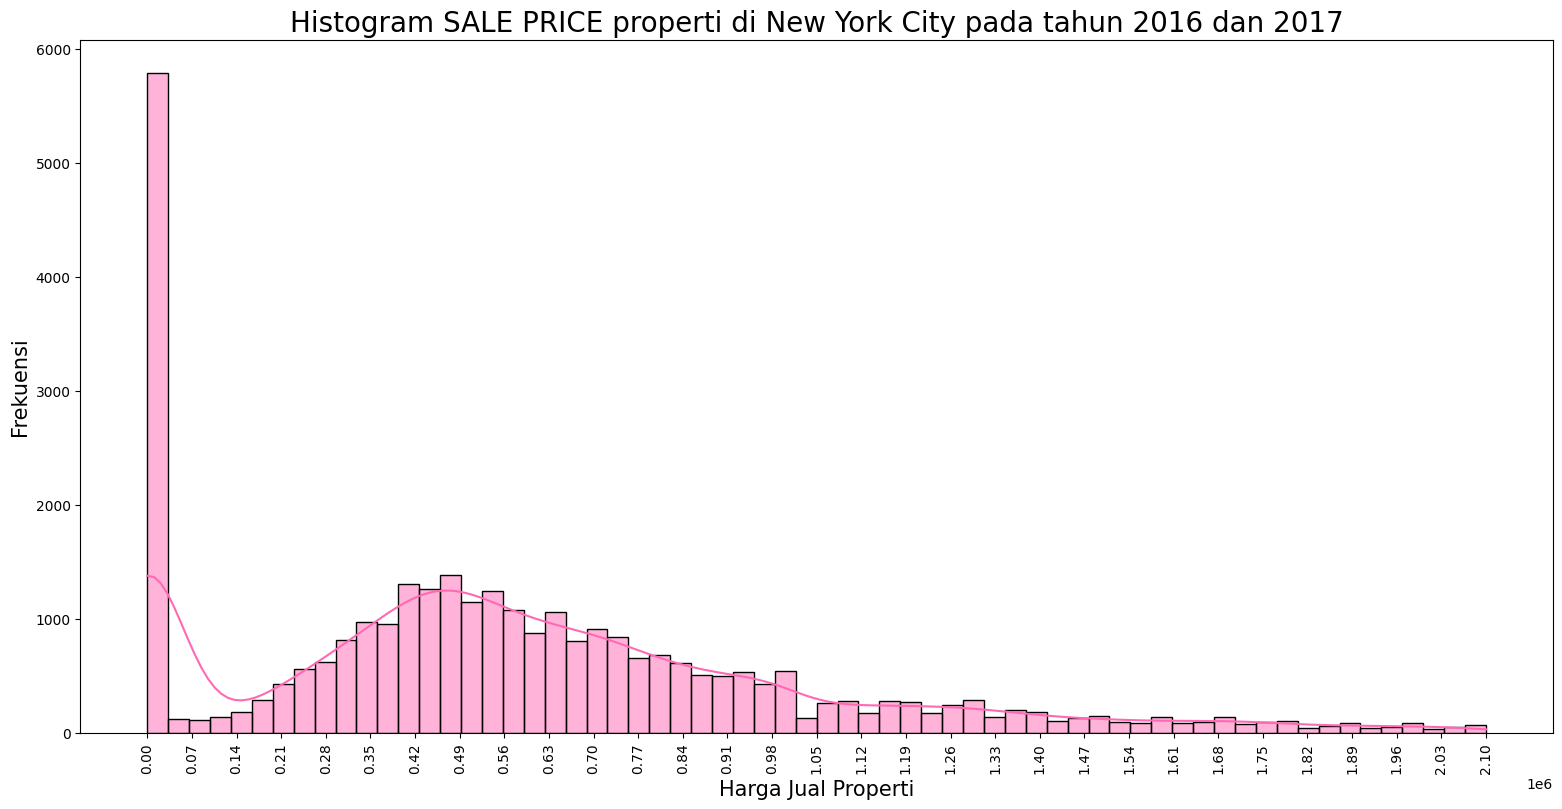

In [81]:
# Plotting for SALE PRICE

fig = plt.figure(figsize = (19, 9))
ax = fig.add_subplot(1, 1, 1)
count, bin_edges_sale_price = np.histogram(df['SALE PRICE'], bins = 30)
sns.histplot(df['SALE PRICE'], kde = True, ax = ax, color = 'hotpink')
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016 dan 2017', size = 20)
ax.set_xlabel('Harga Jual Properti', size = 15)
ax.set_xticks(bin_edges_sale_price)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 15)

Dari grafik ini terlihat bahwa distribusi belum normal. Karena distribusi data belum normal dan cenderung condong ke kanan (right skewed). Oleh karena itu, perlu dilakukan **Central Limit Theorem** agar distribusi datanya menjadi normal.

## Membuat data berdistribusi normal dengan Central Limit Theorem

Central limit theorem akan melakukan sampling pada data dengan mengambil m sampel dari n nilai acak. Pada kasus ini akan dilakukan sampling dengan jumlah sampel **10000** dari **100** nilai acak. Distribusi dari sampel yang diambil akan berdistribusi normal. Sehingga perhitungan CI bisa dilakukan pada sampel yang sudah berdistribusi normal ini

### Perhitungan Central Limit Theorem

In [63]:
sample_means = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # Banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    
    # Ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a = df['SALE PRICE'], size = n)
    
    # Menghitung sample mean
    sample_mean = np.mean(sample_values)
    
    # Append ke list
    sample_means.append(sample_mean)

### Melihat distribusi (histogram) sampel mean dari hasil Central Limit Theorem

Text(0, 0.5, 'Frekuensi')

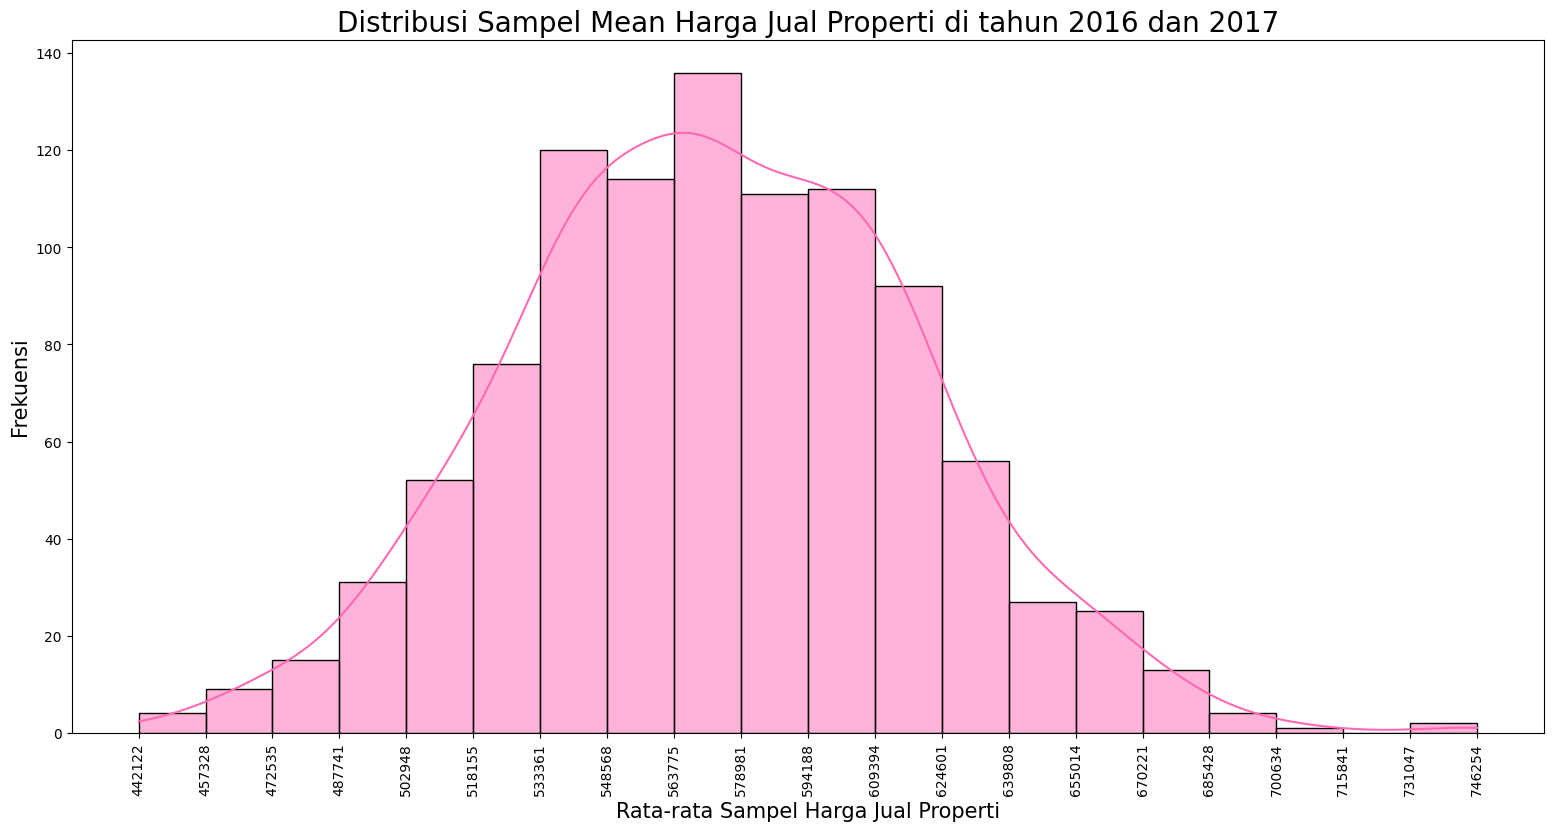

In [80]:
count, bin_edges = np.histogram(sample_means, bins = 20)
fig = plt.figure(figsize = (19, 9))
ax = fig.add_subplot(1, 1, 1)
sns.histplot(sample_means, kde = True, bins = 20, ax = ax, color = 'hotpink')
ax.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2016 dan 2017', size = 20)
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti', size = 15)
ax.set_xticks(bin_edges)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 15)

In [65]:
sample_means_series = pd.Series(sample_means)

# Menghitung nilai rata-rata
print('Rata rata sampel mean SALE PRICE =', sample_means_series.mean())

# Menghitung nilai median
print('Median sampel mean SALE PRICE =', sample_means_series.median())

# Menghitung standard deviasi 
print('Standar Deviasi sampel mean SALE PRICE =', sample_means_series.std())

Rata rata sampel mean SALE PRICE = 573566.96572
Median sampel mean SALE PRICE = 571905.1950000001
Standar Deviasi sampel mean SALE PRICE = 45886.4901268352


**ANALISIS**

Sampel mean untuk **SALE PRICE** hasil dari central limit theorem berdistribusi normal. Hal itu ditandai oleh grafik yang dihasilkan sudah menyerupai bell curve; serta nilai mean dan median yang hampir sama

### Menghitung mean dari sampel mean

In [70]:
mean_of_sampel_mean = np.mean(sample_means)
mean_of_sampel_mean

573566.96572

### Menghitung standar deviasi dari sampel mean

In [72]:
std_of_sampel_mean = np.std(sample_means)
std_of_sampel_mean

45863.54114309081

In [73]:
# tetapkan batas critical z_score 
z_score = 1.96

### Menghitung standard error dari sampel mean

In [74]:
number_of_observation = len(df)
standard_error_of_sampel_mean = pop_std_sale_price / np.sqrt(number_of_observation)
standard_error_of_sampel_mean

2515.605201555207

### Menghitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi

In [75]:
lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean
lower_bound, upper_bound

(568636.3795249518, 578497.5519150482)

### Histogram akhir

Text(0.5, 0, 'Sampel Mean New York Property Sales Price')

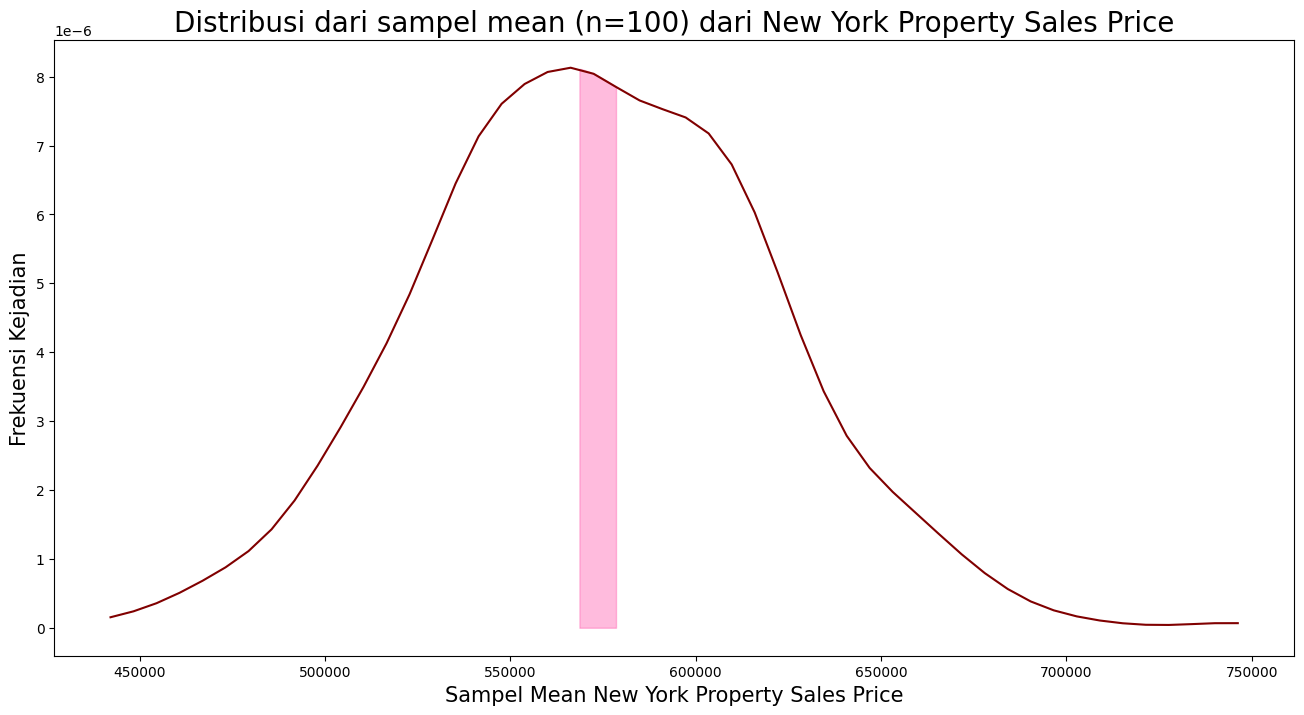

In [79]:
plt.figure(figsize = (16, 8))
kde = scistats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos, kde(pos), color = 'maroon')
shade = np.linspace(lower_bound, upper_bound)
plt.fill_between(shade, kde(shade), alpha = 0.45, color = 'hotpink')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Sales Price', size = 20)
plt.ylabel('Frekuensi Kejadian', size = 15)
plt.xlabel('Sampel Mean New York Property Sales Price', size = 15)

**ANALISIS**

Area di bawah kurva yang diarsir menunjukkan 95% data sampel mean berada pada area ini. Atau dengan kata lain berada dalam rentang +- 1.96 z score dari nilai rata-ratanya.
* **Kesimpulan Confidence Intervals** : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang **569650.8237149519** sampai **579511.9961050482** US Dollar

# Hyphotesis Testing

1. Apakah rata-rata harga jual bangunan di New York City pada tahun 2017 berbeda secara signifikan dari rata-rata harga jual bangunan di New York City pada tahun 2016?

### Deklarasi Hipotesis Null dan Hipotesis Alternatif

Populasi : Harga jual bangunan (properti) dalam NYC Sales Data pada tahun 2016 dan 2017
Parameter of Interest: miu1 --> harga jual bangunan di New York City pada tahun 2016, miu2 --> harga jual bangunan di New York City pada tahun 2017
* H0 : miu1 = miu2
* Ha : miu1 != miu2

### Tentukan level signifikasi

Level signifikansi atau alhpa yang digunakan biasanya 0.05.

1. Jika *p value > alpha* maka terima H0
2. Jika *p value <= alpha* maka tolak H0

### Melihat distribusi (histogram) dari data

Z test dilakukan untuk distribusi data yang normal. Pada tahap ini akan dilihat distribusi dari populasi penjualan bangunan di New York City pada tahun 2016 dan 2017

In [77]:
# Mengambil data penjualan (SALE PRICE) untuk tahun 2016
sales_2016 = df[(df['SALE YEAR'] == 2016)]['SALE PRICE']

# Mengambil data penjualan (SALE PRICE) untuk tahun 2017
sales_2017 = df[(df['SALE YEAR'] == 2017)]['SALE PRICE']

# Menghitung banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)

(11099, 20674)

Text(0, 0.5, 'Frekuensi')

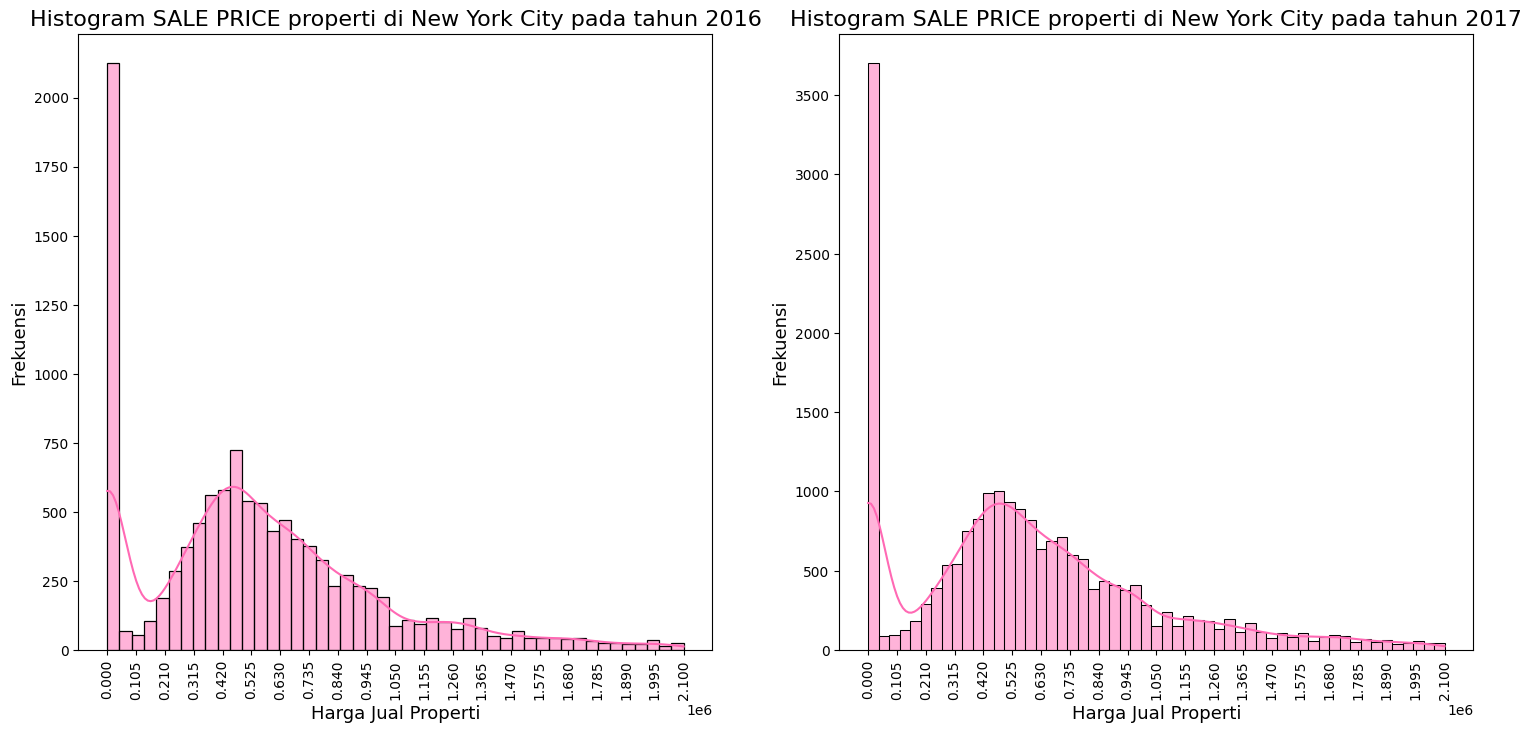

In [88]:
# Menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot (1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sales_2016, bins = 20)
sns.histplot(sales_2016, kde = True, ax = ax, color = 'hotpink')
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016', size = 16)
ax.set_xlabel('Harga Jual Properti', size = 13)
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 13)

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sales_2017, bins = 20)
sns.histplot(sales_2017, kde = True, ax = ax0, color = 'hotpink')
ax0.set_title('Histogram SALE PRICE properti di New York City pada tahun 2017', size = 16)
ax0.set_xlabel('Harga Jual Properti', size = 13)
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation = 90)
ax0.set_ylabel('Frekuensi', size = 13)

**ANALISIS**

Karena jumlah penjualan bangunan pada tahun 2017 tidak seimbang dengan tahun 2016. Selain itu, grafik distribusi histogram juga menunjukkan bahwa data belum berdistribusi normal. Oleh sebab itu, akan dilakukan sampling sesuai dengan central limit theorem. Sampling akan dilakukan sebanyak **1000** sampel yang diambil dari **100** nilai acak pada masing-masing tahun. Setelah data berdistribusi normal, akan dilakukan z test untuk menguji hipotesis yang sudah dibuat

### Implementasi Central Limit Theorem

In [90]:
sample_means_2016 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # Banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    
    # Ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a = sales_2016, size = n)
    
    # Menghitung sample mean
    sample_mean = np.mean(sample_values)
    
    # append ke list
    sample_means_2016.append(sample_mean)

sample_means_2017 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # Banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    
    # Ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a = sales_2017, size = n)
    
    # Menghitung sample mean
    sample_mean = np.mean(sample_values)
    
    # append ke list
    sample_means_2017.append(sample_mean)

Text(0, 0.5, 'Frekuensi')

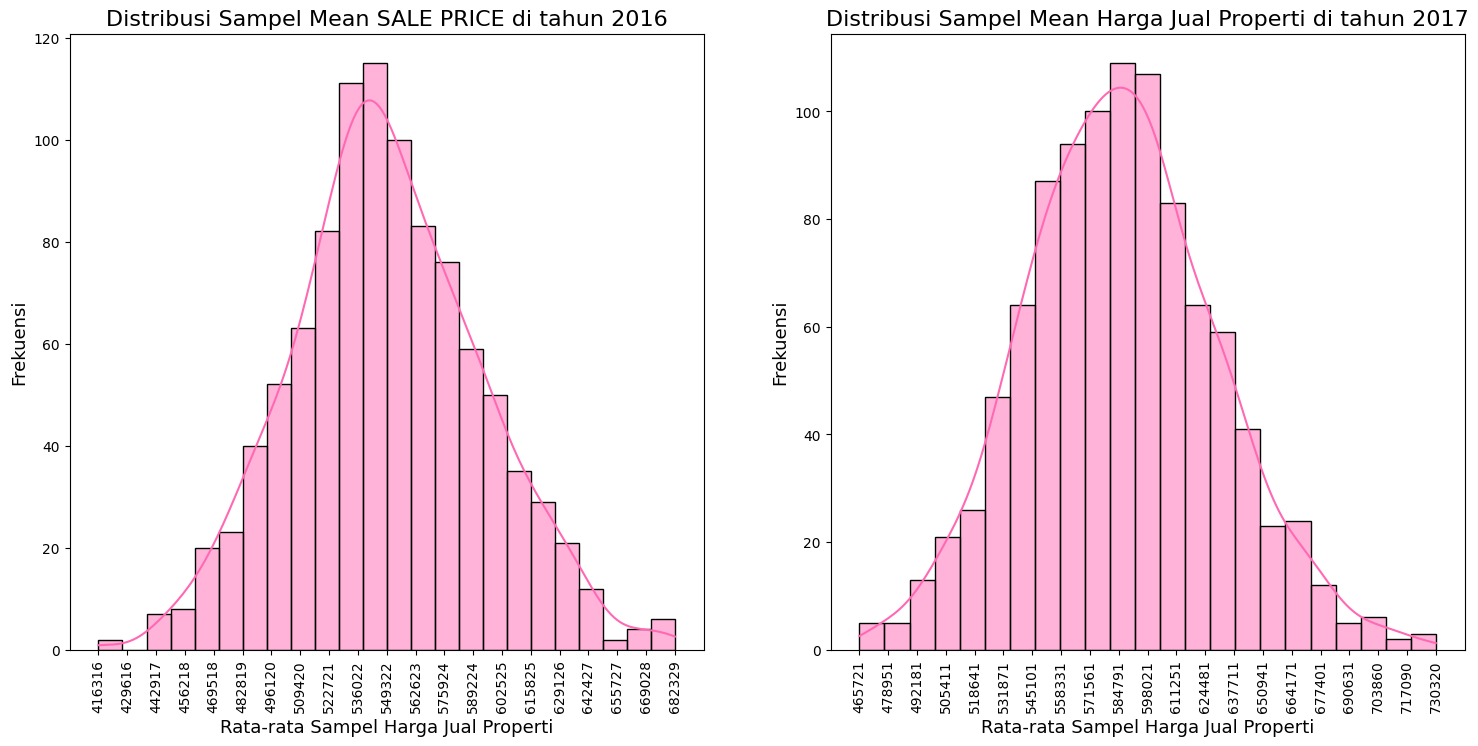

In [92]:
# Menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sample_means_2016, bins = 20)
sns.histplot(sample_means_2016, kde = True, ax = ax, color = 'hotpink')
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016', size = 16)
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti', size = 13)
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_ylabel('Frekuensi', size = 13)

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sample_means_2017, bins = 20)
sns.histplot(sample_means_2017, kde = True, ax = ax0, color = 'hotpink')
ax0.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2017', size = 16)
ax0.set_xlabel('Rata-rata Sampel Harga Jual Properti', size = 13)
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation = 90)
ax0.set_ylabel('Frekuensi', size = 13)

### Menghitung *test statistic*

In [94]:
import statsmodels.api as sm

z_score, pvalue = sm.stats.ztest(sample_means_2016, sample_means_2017, alternative = 'two-sided')
pvalue

1.908602817493205e-77

### Kesimpulan

In [95]:
if pvalue > 0.05 :
    print("H0 diterima")
else:
    print("Ha diterima")

Ha diterima


**ANALISIS**

Karena nilai *p-value* **5.824120169466725e-82** sangat kecil dan nilainya kurang dari atau sama dengan alpha (0.05), maka H0 yang menyatakan bahwa rata-rata harga jual properti di New York City pada tahun 2016 **sama** dengan rata-rata harga jual properti di New York City pada tahun 2017.

Oleh karena itu, Ha diterima, yaitu terdapat perbedaan yang signifikan antara rata-rata harga jual properti di New York City pada tahun 2016 dan 2017

# Analysis

1. **Kesimpulan** : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang **1825.9248896843937** sampai **1839.8270903156063** satuan luas
2. **Kesimpulan** : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang **569650.8237149519** sampai **579511.9961050482** US Dollar
3. **Kesimpulan** : terdapat perbedaan yang signifikan antara rata-rata harga jual properti di New York City pada tahun 2016 dan 2017 pada level signifikansi (alpha) 0,05